# <a href="https://ru.wikipedia.org/wiki/Распределение_Парето">Распределение парето</a>

$F_X(x) = P(X < x) = 1-\Big(\frac{x_m}{x}\Big)^k, \forall x \geq x_m, x_m,k > 0$

$\mathbb E[X]=\frac{kx_m^n}{k-n}, мат. ожидание$

$\mathbb D[X]=\Big(\frac{x_m}{k-1}\Big)^2\frac{k}{k-2} , дисперсия$

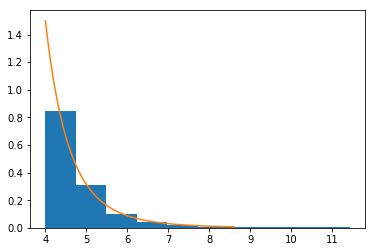

In [425]:
import scipy.stats as sts
from scipy.stats import pareto

x0=4
k=6

pareto_rv=pareto(k, loc=0, scale=x0)
sample=np.linspace(pareto_rv.ppf(0.00), pareto_rv.ppf(0.99), 1000)
pareto_rvs=pareto_rv.rvs(1000)
#строим гистрограмму выборки распределения парето
plt.hist(pareto_rvs, normed=True)
#строим теоритеческую плотность распределения парето
plt.plot(sample, pareto_rv.pdf(sample))

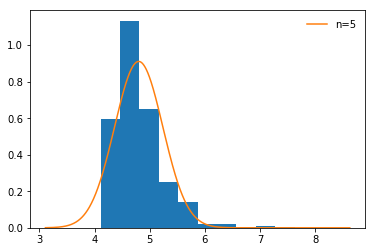

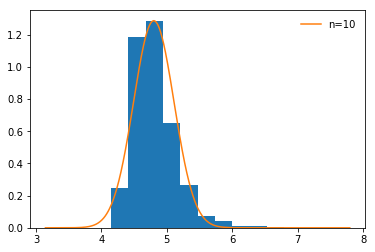

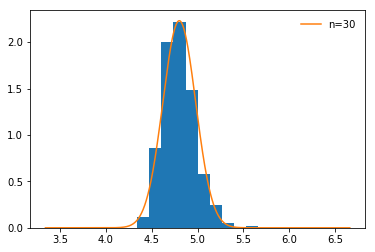

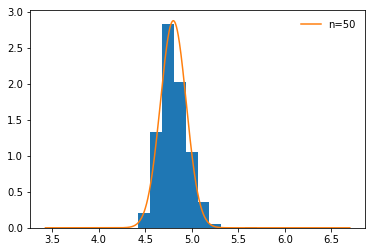

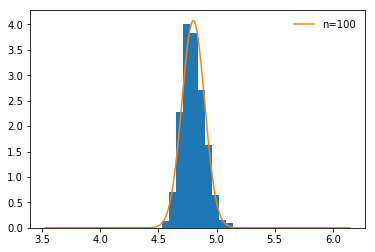

In [426]:
#В цикле пробегаем по выборкам объема n
for n in [5, 10, 30, 50, 100]:
    #Список выборочных средних 
    m=[]
    #В цикле собираем выборочное среднее для выборки объема n
    for i in range(0, 1000):m.append(pareto_rv.rvs(n).mean())        
        
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    #Сторим гистограмму выборочных средних по выборки объема n
    ax.hist(m, normed=True)
    #Сторим нормальное распределение, передаем параметры
    #мю равный теоретическому среднему распр. парето и
    #сигма равный корню квадратному из дисперсии распр. парето деленное по полам
    norm_rv = sts.norm(pareto_rv.mean(), math.sqrt(pareto_rv.var()/n))    
    x = np.linspace(min(m)-1, max(m)+1, 1000)
    ax.plot(x, norm_rv.pdf(x), label='n='+str(n))
    ax.legend(loc='best', frameon=False)    

### с ростом n видим что выборочные средние распределения парето апроксимируются нормальным распределением